In [1]:
import requests
import json


import re

import spacy
nlp = spacy.load('de') #load spacy model


# for WordClouds 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
with open("../../data/speeches_20.jsonl",'r',encoding = "utf8") as fp:
    data = list(fp)
speeches = []
for line in data:
    speeches.append(json.loads(line))

#with open('../../data/speeches_preprocessed.json', 'r') as fp:
#    data = json.load(fp)    
    
#speeches = data.copy()
    
    

In [18]:
len(speeches)

4866

In [19]:
speeches[2776]

{'text': 'Sehr geehrte Frau Präsidentin! Liebe Kolleginnen und Kollegen! Die Auswirkungen des völkerrechtswidrigen Krieges von Wladimir Putin in der Ukraine und der damit einhergehenden Sanktionen sind natürlich auch in Deutschland zu spüren. Das spiegelt auch die ifo-Konjunkturprognose von gestern wider, die statt von einem Wachstum von 3,7\xa0Prozent nur noch von 3,1\xa0Prozent, in einem Alternativszenario nur noch von 2,2\xa0Prozent ausgeht. Diese wirtschaftlichen Verwerfungen führen natürlich auch zu Preissteigerungen. All das sind Belastungen, die natürlich bei unseren Bürgerinnen und Bürgern, bei sozial Schwachen, bei den Arbeitsplätzen, bei den Unternehmen ankommen, vor allem natürlich die energieintensiven Branchen treffen und die Logistikbranche, die Achillesferse unserer Wirtschaft. Deshalb, liebe Kolleginnen und Kollegen, ist es richtig gewesen, dass sich die Bundesregierung, dass sich die Koalitionsfraktionen von SPD, Grünen und FDP schon vor einigen Wochen auf ein erstes E

In [5]:

def filter_for(what, search_terms, speeches):
    filtered_speeches = []
    if what == 'text':
        search_terms_low = []
        for st in search_terms:
            search_terms_low.append(st.lower())
        for speech in speeches:
            match = [st in speech[what].lower() for st in search_terms_low]
            if all(st == True for st in match):
            #if any(st in speech[what] for st in search_terms):
                #print(match)
            #if ( search_terms in speech[what] ):
                filtered_speeches.append(speech)
    else:
        for speech in speeches:
            if ( speech[what].lower() in set(search_terms_low) ):
                filtered_speeches.append(speech)
        
    filtered_speeches.sort(key = lambda x:x['date'])   
    return filtered_speeches



In [9]:
#focal_terms = ['Digitalisierung','Zusammenhalt','Demokratie']
#focal_terms = ['Digitalisierung']
#focal_terms = ['Plattform','Demokratie']
#focal_terms = ['extrem','Plattform']
#focal_terms = ['plattform','demokratie']
#focal_terms = ['Plattform','Meinung']
#focal_terms = ['sozial','Netzwerk','Meinung']
focal_terms = ['social']
#subset = filter_for('party', ['CDU/CSU'], speeches)
subset = filter_for('text', focal_terms, speeches)
len(subset)

22

In [11]:

#subset

In [15]:
sentences = []
focus = 'social'
for rede in subset:
    doc = nlp(rede["text"])
    print(rede['name'])
    for sent in doc.sents:
        #print(sent.text)
        #if all(ft.lower() in sent.text.lower() for ft in focal_terms):
        #if focal_terms[0].lower() in sent.text.lower() and focal_terms[1].lower() in sent.text.lower():
        #for focus in focal_terms:    
        if focus.lower() in sent.text.lower():        
            sentences.append(sent)
        
        
len(sentences)

Stefan Müller
Zanda Martens
Catarina Santos Firnhaber
Helge Lindh
Thomas Hacker
Leni Breymaier
Olaf Scholz
Filiz Polat
Nils Schmid
Helge Lindh
Thomas Hacker
Ralf Stegner
Ralf Stegner
Carsten Müller
Boris Mijatović
Michael Schrodi
Axel Echeverria
Elisabeth Winkelmeier-Becker
Nils Schmid
Heike Engelhardt
Britta Haßelmann
Annalena Baerbock


25

In [20]:
#sentences

In [451]:
relevantPOS = ['NOUN','ADJ','PROPN']
sentencesNN = []
words = []
for sen in sentences:
    lem = []
    for token in sen:
        if token.pos_ in relevantPOS:
            lem.append(token.lemma_)
    sentencesNN.append(lem)
    words.extend(lem)
#sentencesNN
#words

In [452]:
nodes=[]
curid=1
for word in set(words):
    node = {
    'id' :  curid,
    'name' : word
    }
    nodes.append(node)
    curid=curid+1
    
graph = {
    'directed': False,
    'graph': 'word_graph',
    'links': [],
    'nodes': nodes
}

links = []
linkedwords =[]
linkedids =[]
lx = 0;
for wx1,w1 in enumerate(nodes):
    #print(wx1)
    for wx2,w2 in enumerate(nodes):
        if(w2['id'] > w1['id']):
            for sen in sentencesNN:
                if w1['name'] in sen and w2['name'] in sen:
                    weight = len([ele for ele in linkedwords if ele == (' '.join([w1['name'],w2['name']]))])
                    #    links[]
                    #else:
                    #print(weight)
                    linkedwords.append(' '.join([w1['name'],w2['name']]))
                    #linkedids[ w1['id'] ] , w2['id'] )
                    link_dict = {
                    'source':w1['id'],
                    'target':w2['id'],
                    'sourceWD':w1['name'],
                    'targetWD':w2['name'],
                    'weight': weight+1      
                    }
                    #print(link_dict)
                    links.append(link_dict)
                    graph['links'].append(link_dict)
               
                    #for link in links:

#linkedwords
zähler = collections.Counter(linkedwords).most_common()
print(len(linkedwords),len(links))
#graph['links']=links
#print(zähler)

987 987


In [433]:
for link in links:
    if link['weight']>0:
        graph['links'].append(link)

In [453]:
print(len(graph['links']),
len(graph['nodes']))
#for link in graph['links']:
#    if link['weight']>1:
        #print(link)

987 151


In [393]:
json = {'data':graph, 
        'nodecoloring':'party', 
        'nodelabel': 'name', 
        #'nodelabel': 'mfic',
        "darkmode": False,
        "edgevisibility": True,
        "particles": False
       }
result = requests.post('https://penelope.vub.be/network-components/visualiser', json=json)

with open (f"./wordnet.html", "w") as f:
    f.write(result.json()['graph'])

In [454]:
import networkx as nx
import tqdm

graphforgephi = nx.Graph()
for node in tqdm.tqdm(graph['nodes']):
    graphforgephi.add_node(node['id'],name = node['name']);
print('nodes done')
for link in tqdm.tqdm(graph['links']):
    #weight = all((' '.join([w1['name'],w2['name']]) in linkedwords)
    #print(weight)         
    graphforgephi.add_edge(link['source'],link['target'],weight=link['weight'])
print('links done')   
nx.write_gexf(graphforgephi, "graphforgephi.gexf")
print('save done')

100%|██████████| 987/987 [00:00<00:00, 374878.03it/s]

nodes done
links done
save done


In [190]:

input_list = []
for sen in sentences:
            input_dict = {
                'text'  : sen
            }
            input_list.append(input_dict) 

json = {
          "data": input_list,
          "language": "de",
          "relevant_pos": ["NOUN","PROPN",'ADJ'],
          "ignore": focal_terms + ['Herr','Frau','Präsident','Präsidentin', 'Damen', 'Herren']
}
print(focal_terms + ['Herr','Frau','Präsident','Präsidentin', 'Damen', 'Herren'])
result = requests.post('https://penelope.vub.be/network-components/statementgraphgenerator', json=json)
result

['Plattform', 'Demokratie', 'Herr', 'Frau', 'Präsident', 'Präsidentin', 'Damen', 'Herren']


<Response [200]>

12 6
12 6


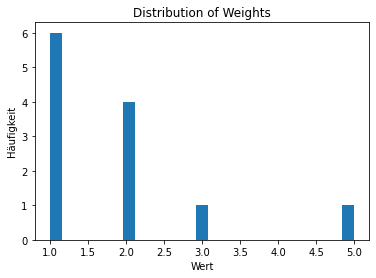

In [191]:
graph = result.json()
print(len(graph['links']),
len(graph['nodes']))
#graph

print(len(graph['links']),
len(graph['nodes']))

weights=[]
for link in graph['links']:
    weights.append(link['weight'])

plt.hist(weights, bins=25)
plt.title("Distribution of Weights")
plt.xlabel("Wert")
plt.ylabel("Häufigkeit")
plt.show()



In [192]:
newlinks = []
for link in graph['links']:
    if link['weight'] > 1:
        newlinks.append(link)
graph['links'] = newlinks 
print(len(graph['links']))

6


In [194]:
json = {'data':graph, 
        'nodecoloring':'party', 
        #'nodelabel': 'text', 
        'nodelabel': 'mfic',
        "darkmode": False,
        "edgevisibility": True,
        "particles": False
       }
result = requests.post('https://penelope.vub.be/network-components/visualiser', json=json)

with open (f"./sennet.html", "w") as f:
    f.write(result.json()['graph'])

In [147]:
contextwords = []
window = 10
for rede in subset:
    wordlist = rede['text'].split()   
    # do the nlp stuff
    #tokenized = nltk.word_tokenize(rede['text'])
    #nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    for focus in focal_terms:
        ixs = [i for i, j in enumerate(wordlist) if j == focus]
        for ix in ixs:
            contextwords.extend(wordlist[ix-window:ix+window])
    
len(contextwords)

717

In [145]:
contextwords = []
relevantPOS = ['NOUN','ADJ']
window = 10
for sen in sentences:
    text_lem = []
    text_pos = []
    for token in sen:
        if token.is_punct is not True and token.is_stop is not True and token.pos_ in relevantPOS:
            text_lem.append(token.lemma_)
            text_pos.append(token.pos_)
    wordlist = text_lem    
    contextwords.extend(wordlist)
    
len(contextwords)

751

[('Demokratie', 5), ('Plattformen', 5), ('Risiken', 2), ('Plattform', 1), ('gesellschaftliche', 1), ('System', 1), ('Telegram', 1), ('Straftaten', 1), ('Maxime', 1), ('Klicks', 1), ('größer', 1), ('werdende', 1), ('Datensammlungen', 1), ('User/-innen', 1), ('Präsidentschaft', 1), ('verbundenen', 1), ('Ausführungen', 1), ('Twitter', 1), ('Gefahr', 1), ('Demokratien', 1), ('Bundesverfassungsgerichtsurteil', 1), ('18.', 1), ('Juli', 1), ('öffentlich-rechtliche', 1), ('Rundfunk', 1), ('Werte', 1), ('freiheitlichen', 1), ('Ausdruck', 1), ('aktuellen', 1), ('Form', 1), ('enorme', 1), ('Bedrohung', 1), ('Informationsfreiheit', 1), ('marktbeherrschenden', 1), ('globalistischen', 1), ('Plattformbetreiber', 1), ('eigene', 1), ('politische', 1), ('Agenda', 1), ('politisch', 1), ('ungewollte', 1), ('Meinungsäußerungen', 1), ('zunehmend', 1)]


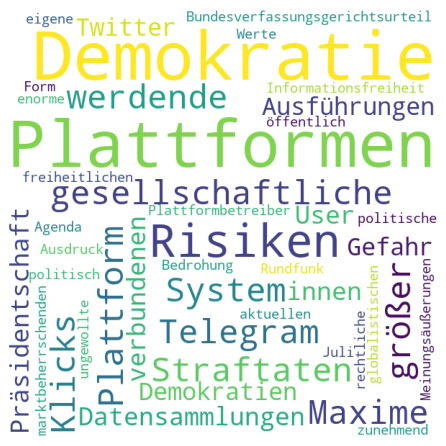

In [207]:
contextwords = sentencesNN

import collections
zähler = collections.Counter(contextwords).most_common()
print(zähler)

wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                max_words=100,
                min_font_size = 10).generate(' '.join(contextwords))
 
# plot the WordCloud image                      
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


In [ ]:


import nltk

contextwords = []
window = 10
for rede in subset:
    wordlist = rede['text'].split()   
    # do the nlp stuff
    tokenized = nltk.word_tokenize(rede['text'])
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

    for focus in focal_terms:
        ixs = [i for i, j in enumerate(tokenized) if j == focus]
        for ix in ixs:
            contextwords.extend(tokenized[ix-window:ix+window])
    
    
len(contextwords)

In [157]:
def StatementGraphGenerator(inParams):

    stm_list = inParams['data']
    
    if inParams['language'] == 'en':
        nlp = spacy.load('en_core_web_sm') #load english spacy model
    elif inParams['language'] == 'de':
        nlp = spacy.load('de_core_news_sm') #load german spacy model
    elif inParams['language'] == 'fr':
        nlp = spacy.load('fr_core_news_sm') #load french spacy model
    elif inParams['language'] == 'es':
        nlp = spacy.load('es_core_news_sm') #load spanish spacy model
    elif inParams['language'] == 'pt':
        nlp = spacy.load('pt_core_news_sm') #load portuguese spacy model
    elif inParams['language'] == 'it':
        nlp = spacy.load('it_core_news_sm') #load italian spacy model
    elif inParams['language'] == 'nl':
        nlp = spacy.load('nl_core_news_sm') #load dutch spacy model
    elif inParams['language'] == 'el':
        nlp = spacy.load('el_core_news_sm') #load greek spacy model
    elif inParams['language'] == 'nb':
        nlp = spacy.load('nb_core_news_sm') #load norwegian bokmal spacy model
    elif inParams['language'] == 'lt':
        nlp = spacy.load('lt_core_news_sm') #load lithuanian spacy model
    elif inParams['language'] == 'xx':
        nlp = spacy.load('xx_ent_wiki_sm') #load multi-language spacy model

    else:
        print('ERROR! Language not supported!')
        
    relevantPOS = inParams['pos']
    ignoreLEM = inParams['ignore']
    
    # 1.2.2 Note: requires spacy and language model to be loaded
    print('apply nlp pipeline')
    for value in tqdm.tqdm(stm_list):
        doc = nlp(value['text'])
        value.update({'doc' : doc})
    
    # 1.2.3
    # Data cleaning options
    print('filter words')
    #relevantPOS = ['NOUN','VERB','ADJ']
    #ignoreLEM = ['Herr','Kollege','Dame','Frau','Präsident']
    #ignoreLEM = []

    stm_list_nlp = []
    statements_lemma_list = []
    #statements_pos_list = []
    for stm in tqdm.tqdm(stm_list):
        lemmas = []
        pos = []
        for token in stm['doc']:
            if token.is_punct is not True and token.is_stop is not True and token.pos_ in relevantPOS and token.lemma_ not in ignoreLEM:
                lemmas.append(token.lemma_)
                pos.append(token.pos_)
        stm.update({'lemmata' : lemmas})    
        statements_lemma_list.append(lemmas)
        #statements_pos_list.append(pos)

    # 1.2.4
    print('count and order lemmata')
    flattened = [val for lemmas in statements_lemma_list for val in lemmas]
    lemma_frequency_list = collections.Counter(flattened).most_common()
    all_lemmata_list = [ i[0] for i in lemma_frequency_list ]
    all_lemmata_count = [ i[1] for i in lemma_frequency_list ]

    # remove single items
    # 1.2.5
    print('remove singles')
    all_freq_lemmata_list = [ all_lemmata_list[i] for i,v in enumerate(all_lemmata_list) if (all_lemmata_count[i] > 1) ]
    all_freq_lemmata_count = [ all_lemmata_count[i] for i,v in enumerate(all_lemmata_count) if (all_lemmata_count[i] > 1) ]
        
    all_lemmata_list = all_freq_lemmata_list
    all_lemmata_count = all_freq_lemmata_count 

    # Construct word browsable dict for later use in semantic relatedness computation
    wordscounts_dict = {}
    for lx,lem in enumerate(all_lemmata_list):
        wordscounts_dict.update({ lem : all_lemmata_count[lx] })
 
    # From this file
    stmnet_dict = {
        'nodes' : [],
        'links' : []
        }    
 

    for ix,stm in enumerate(stm_list):
        if len(stm['lemmata']) > 0:
            node_dict = {
                'id' : ix+1
            }
            for ele in stm:
                if ele != 'lemmata' and ele != 'doc':
                    node_dict.update({ele : stm[ele]})
            
            mfic = [ lem for lem in all_lemmata_list if (lem in stm['lemmata'] )]
            freqI = collections.Counter(stm['lemmata']).most_common()
            #lemmataI = [ i[0] for i in freqI ]
            if len(mfic)>0:
                #node_dict.update({'mfic' : mfic[0]})
                node_dict.update({'mfic' : freqI[0]})
            else:
                node_dict.update({'mfic' : ' '})
    
            stmnet_dict['nodes'].append(node_dict)
    
    
    #stmnet_dict['graph']['edges'] = []
    for nodeI in tqdm.tqdm(stmnet_dict['nodes']):
        stmI = stm_list[ nodeI['id']-1 ]['lemmata']
        for nodeJ in stmnet_dict['nodes']:     
            if nodeI['id'] < nodeJ['id']:
                stmJ = stm_list[ nodeJ['id']-1 ]['lemmata']
                overlap = [ lem for lem in set(stmI) if (lem in set(stmJ))]  # set overlap
                weight = len(overlap) #/ (len(stmI)+len(stmJ))
                if (len(overlap) > 0):
                    edge_dict = {
                        'source' : nodeI['id'],
                        'target' : nodeJ['id'],
                        'weight' : weight
                        }
                    stmnet_dict['links'].append(edge_dict)
    
    return stmnet_dict